<a href="https://colab.research.google.com/github/amatchison/CS4410/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns

In [3]:
#Loading the Dataset
cancer = load_breast_cancer()

In [5]:
#Checking the Sample and Target Sizes
cancer.data.shape

(569, 30)

In [7]:
#Splitting the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=11)

In [9]:
#Training and Testing Set Sizes
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [11]:
#Creating the Model
gnb = GaussianNB()

In [12]:
#Training the Model
gnb.fit(X=X_train, y=y_train)

GaussianNB()

In [15]:
#Predicting
predicted = gnb.predict(X_test)
expected = y_test

print(predicted[:20])
print(expected[:20])

[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
[0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0]


In [17]:
#Estimator Method score
print(f'{gnb.score(X_test,y_test):.2%}')

95.10%


In [21]:
#Confusion Matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[44,  6],
       [ 1, 92]])

In [24]:
#Classification Report
names = [str(sample) for sample in cancer.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



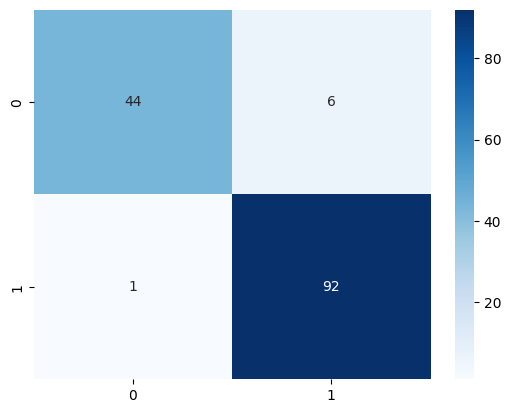

In [30]:
#Visualizing the Confusion Matrix
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))
axes = sns. heatmap(confusion_df, annot=True, cmap='Blues')

In [32]:
#K-Fold Cross-Validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [38]:
#Using the KFold Object with Function cross_val_score:
scores = cross_val_score(estimator=gnb, X=cancer.data, y=cancer.target, cv=kfold)
print(scores)
print()
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

[0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]

Mean accuracy: 93.85%
Accuracy standard deviation: 2.75%


In [40]:
#Running Multiple Models to Find the Best One:
estimators = {
    'GaussianNB': gnb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}

for estimator_name, estimator_object in estimators.items():
  scores = cross_val_score(estimator=estimator_object, X=cancer.data, y=cancer.target, cv=kfold)
  print(f'{estimator_name:>20}: ' +
        f'Mean accuracy = {scores.mean():.2%}; ' +
        f'Standard deviation = {scores.std():.2%}')

          GaussianNB: Mean accuracy = 93.85%; Standard deviation = 2.75%
KNeighborsClassifier: Mean accuracy = 92.79%; Standard deviation = 2.01%
  LogisticRegression: Mean accuracy = 95.08%; Standard deviation = 3.02%
                 SVC: Mean accuracy = 91.92%; Standard deviation = 3.52%
